<a href="https://colab.research.google.com/github/semesarker/A-Text-Independent-Speech-Emotion-Recognition-Based-on-Convolution-Neural-Network/blob/main/CNN_2D_Model_using_both_MFCC_%26_Melspectrogram_features_on_Ravdess%26_TESS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!unzip '/content/drive/MyDrive/thesis/RAV.zip'

Archive:  /content/drive/MyDrive/thesis/RAV.zip
   creating: rav/
   creating: rav/Actor_01/
  inflating: rav/Actor_01/03-01-01-01-01-01-01.wav  
  inflating: rav/Actor_01/03-01-01-01-01-02-01.wav  
  inflating: rav/Actor_01/03-01-01-01-02-01-01.wav  
  inflating: rav/Actor_01/03-01-01-01-02-02-01.wav  
  inflating: rav/Actor_01/03-01-02-01-01-01-01.wav  
  inflating: rav/Actor_01/03-01-02-01-01-02-01.wav  
  inflating: rav/Actor_01/03-01-02-01-02-01-01.wav  
  inflating: rav/Actor_01/03-01-02-01-02-02-01.wav  
  inflating: rav/Actor_01/03-01-02-02-01-01-01.wav  
  inflating: rav/Actor_01/03-01-02-02-01-02-01.wav  
  inflating: rav/Actor_01/03-01-02-02-02-01-01.wav  
  inflating: rav/Actor_01/03-01-02-02-02-02-01.wav  
  inflating: rav/Actor_01/03-01-03-01-01-01-01.wav  
  inflating: rav/Actor_01/03-01-03-01-01-02-01.wav  
  inflating: rav/Actor_01/03-01-03-01-02-01-01.wav  
  inflating: rav/Actor_01/03-01-03-01-02-02-01.wav  
  inflating: rav/Actor_01/03-01-03-02-01-01-01.wav  
  infl

In [ ]:
!unzip '/content/drive/MyDrive/thesis/TESS.zip'

Archive:  /content/drive/MyDrive/thesis/TESS.zip
   creating: TESS/
   creating: TESS/OAF_angry/
  inflating: TESS/OAF_angry/OAF_back_angry.wav  
  inflating: TESS/OAF_angry/OAF_bar_angry.wav  
  inflating: TESS/OAF_angry/OAF_base_angry.wav  
  inflating: TESS/OAF_angry/OAF_bath_angry.wav  
  inflating: TESS/OAF_angry/OAF_bean_angry.wav  
  inflating: TESS/OAF_angry/OAF_beg_angry.wav  
  inflating: TESS/OAF_angry/OAF_bite_angry.wav  
  inflating: TESS/OAF_angry/OAF_boat_angry.wav  
  inflating: TESS/OAF_angry/OAF_bone_angry.wav  
  inflating: TESS/OAF_angry/OAF_book_angry.wav  
  inflating: TESS/OAF_angry/OAF_bought_angry.wav  
  inflating: TESS/OAF_angry/OAF_burn_angry.wav  
  inflating: TESS/OAF_angry/OAF_cab_angry.wav  
  inflating: TESS/OAF_angry/OAF_calm_angry.wav  
  inflating: TESS/OAF_angry/OAF_came_angry.wav  
  inflating: TESS/OAF_angry/OAF_cause_angry.wav  
  inflating: TESS/OAF_angry/OAF_chain_angry.wav  
  inflating: TESS/OAF_angry/OAF_chair_angry.wav  
  inflating: TESS/O

In [ ]:
# Keras
#import tensorflow as tf
from IPython.display import Audio
import keras
from keras import regularizers

from keras.models import Sequential, Model, model_from_json
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv1D,Conv2D,MaxPool2D, MaxPooling1D, AveragePooling1D
from tensorflow.keras.utils import to_categorical
from keras.callbacks import (EarlyStopping, LearningRateScheduler,
                             ModelCheckpoint, TensorBoard, ReduceLROnPlateau)
from keras import losses, models, optimizers
from keras.activations import relu, softmax
from keras.layers import (Conv2D,Conv2DTranspose, GlobalAveragePooling2D, BatchNormalization, Flatten, Dropout,
                          GlobalMaxPool2D, MaxPool2D, concatenate, Activation, Input, Dense)
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer


from keras_preprocessing.sequence import pad_sequences


# sklearn
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Other
from tqdm import tqdm, tqdm_pandas
import scipy
from scipy.stats import skew
import librosa
import librosa.display
import json
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import seaborn as sns
import glob
import os
import sys
import IPython.display as Audio  # To play sound in the notebook
import warnings

import numpy as np # linear algebra
import pandas as pd
from tqdm import tqdm
from glob import glob
from keras.layers import *
from keras.models import *
from keras.utils import *
import numpy as np
import os
from tensorflow.keras.optimizers import Adam

# ignore warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [ ]:
Ravdess = '/content/rav'
ravdess_directory_list = os.listdir(Ravdess)
ravdess_directory_list

['Actor_12',
 'Actor_14',
 'Actor_22',
 'Actor_19',
 'Actor_21',
 'Actor_02',
 'Actor_20',
 'Actor_13',
 'Actor_09',
 'Actor_08',
 'Actor_18',
 'Actor_23',
 'Actor_17',
 'Actor_04',
 'Actor_03',
 'Actor_15',
 'Actor_05',
 'Actor_06',
 'Actor_10',
 'Actor_24',
 'Actor_16',
 'Actor_01',
 'Actor_07',
 'Actor_11']

In [ ]:
# Ravdess preprocess
ravdess_directory_list = os.listdir(Ravdess)
file_path = []
file_emotion = []
for directory in ravdess_directory_list:
    # 24 different actors in Ravdess directory needed to be extracted as files for each actor
    actor = os.listdir(Ravdess + '/' + directory)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        # third part in each file represents the emotion associated to that file
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess + '/' + directory + '/' + file)

In [ ]:
file_path

['/content/rav/Actor_12/03-01-08-01-02-01-12.wav',
 '/content/rav/Actor_12/03-01-01-01-02-02-12.wav',
 '/content/rav/Actor_12/03-01-07-02-02-02-12.wav',
 '/content/rav/Actor_12/03-01-02-01-01-02-12.wav',
 '/content/rav/Actor_12/03-01-03-01-02-02-12.wav',
 '/content/rav/Actor_12/03-01-07-01-02-01-12.wav',
 '/content/rav/Actor_12/03-01-02-02-01-01-12.wav',
 '/content/rav/Actor_12/03-01-05-02-01-01-12.wav',
 '/content/rav/Actor_12/03-01-07-01-02-02-12.wav',
 '/content/rav/Actor_12/03-01-05-01-01-02-12.wav',
 '/content/rav/Actor_12/03-01-07-02-01-02-12.wav',
 '/content/rav/Actor_12/03-01-06-01-02-02-12.wav',
 '/content/rav/Actor_12/03-01-03-01-01-02-12.wav',
 '/content/rav/Actor_12/03-01-04-02-02-01-12.wav',
 '/content/rav/Actor_12/03-01-08-01-01-01-12.wav',
 '/content/rav/Actor_12/03-01-01-01-02-01-12.wav',
 '/content/rav/Actor_12/03-01-08-01-01-02-12.wav',
 '/content/rav/Actor_12/03-01-02-02-01-02-12.wav',
 '/content/rav/Actor_12/03-01-06-02-01-01-12.wav',
 '/content/rav/Actor_12/03-01-0

In [ ]:
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
# dataframe for path of files
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)
# decode integers to actual emotions
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head()

,Emotions,Path
0,surprise,/content/rav/Actor_12/03-01-08-01-02-01-12.wav
1,neutral,/content/rav/Actor_12/03-01-01-01-02-02-12.wav
2,disgust,/content/rav/Actor_12/03-01-07-02-02-02-12.wav
3,calm,/content/rav/Actor_12/03-01-02-01-01-02-12.wav
4,happy,/content/rav/Actor_12/03-01-03-01-02-02-12.wav


In [ ]:
Ravdess_df.shape

(1440, 2)

In [ ]:
Tess='/content/TESS'
tess_directory_list = os.listdir(Tess)
tess_directory_list

['YAF_disgust',
 'OAF_happy',
 'OAF_Sad',
 'OAF_angry',
 'OAF_disgust',
 'OAF_Pleasant_surprise',
 'YAF_pleasant_surprised',
 'YAF_sad',
 'OAF_Fear',
 'YAF_neutral',
 'OAF_neutral',
 'YAF_happy',
 'YAF_angry',
 'YAF_fear']

In [ ]:
# TESS preprocess
# increase the data available for surprise emotion
tess_directory_list = os.listdir(Tess)
file_path = []
file_emotion = []
for dir in tess_directory_list:
    directories = os.listdir(Tess +'/'+  dir)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(Tess + '/' + dir + '/' + file)

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.head()

,Emotions,Path
0,disgust,/content/TESS/YAF_disgust/YAF_rat_disgust.wav
1,disgust,/content/TESS/YAF_disgust/YAF_red_disgust.wav
2,disgust,/content/TESS/YAF_disgust/YAF_puff_disgust.wav
3,disgust,/content/TESS/YAF_disgust/YAF_shirt_disgust.wav
4,disgust,/content/TESS/YAF_disgust/YAF_far_disgust.wav


In [ ]:
Tess_df.shape

(2800, 2)

In [ ]:
data_path = pd.concat([Ravdess_df, Tess_df], axis = 0)
data_path

,Emotions,Path
0,surprise,/content/rav/Actor_12/03-01-08-01-02-01-12.wav
1,neutral,/content/rav/Actor_12/03-01-01-01-02-02-12.wav
2,disgust,/content/rav/Actor_12/03-01-07-02-02-02-12.wav
3,calm,/content/rav/Actor_12/03-01-02-01-01-02-12.wav
4,happy,/content/rav/Actor_12/03-01-03-01-02-02-12.wav
...,...,...
2795,fear,/content/TESS/YAF_fear/YAF_hole_fear.wav
2796,fear,/content/TESS/YAF_fear/YAF_dip_fear.wav
2797,fear,/content/TESS/YAF_fear/YAF_king_fear.wav
2798,fear,/content/TESS/YAF_fear/YAF_hire_fear.wav


In [ ]:
index = list(np.arange(start=0, stop=4240, step=1))
data_path.index = index

In [ ]:
data_path.reset_index()

,index,Emotions,Path
0,0,surprise,/content/rav/Actor_12/03-01-08-01-02-01-12.wav
1,1,neutral,/content/rav/Actor_12/03-01-01-01-02-02-12.wav
2,2,disgust,/content/rav/Actor_12/03-01-07-02-02-02-12.wav
3,3,calm,/content/rav/Actor_12/03-01-02-01-01-02-12.wav
4,4,happy,/content/rav/Actor_12/03-01-03-01-02-02-12.wav
...,...,...,...
4235,4235,fear,/content/TESS/YAF_fear/YAF_hole_fear.wav
4236,4236,fear,/content/TESS/YAF_fear/YAF_dip_fear.wav
4237,4237,fear,/content/TESS/YAF_fear/YAF_king_fear.wav
4238,4238,fear,/content/TESS/YAF_fear/YAF_hire_fear.wav


In [ ]:
data_path.drop(['index'],axis=1)

KeyError: ignored

In [ ]:
data_path

,Emotions,Path
0,surprise,/content/rav/Actor_12/03-01-08-01-02-01-12.wav
1,neutral,/content/rav/Actor_12/03-01-01-01-02-02-12.wav
2,disgust,/content/rav/Actor_12/03-01-07-02-02-02-12.wav
3,calm,/content/rav/Actor_12/03-01-02-01-01-02-12.wav
4,happy,/content/rav/Actor_12/03-01-03-01-02-02-12.wav
...,...,...
4235,fear,/content/TESS/YAF_fear/YAF_hole_fear.wav
4236,fear,/content/TESS/YAF_fear/YAF_dip_fear.wav
4237,fear,/content/TESS/YAF_fear/YAF_king_fear.wav
4238,fear,/content/TESS/YAF_fear/YAF_hire_fear.wav


In [ ]:
data_path.Emotions.value_counts()

surprise    592
disgust     592
happy       592
angry       592
fear        592
sad         592
neutral     496
calm        192
Name: Emotions, dtype: int64

In [ ]:
def match_dimension(data,input_length):

  if len(data) > input_length:
      max_offset = int(len(data) - input_length)
      data = data[0:input_length]
  else:
      max_offset =int(input_length - len(data))
      offset = np.zeros(max_offset)
      data=np.concatenate((data,offset),axis=0)

  return data

In [ ]:
def create_mel_spec(data,sr,e):
    melspec = librosa.feature.melspectrogram(data, n_mels = 30)
    logspec = librosa.amplitude_to_db(melspec)
    plt.figure(figsize=(12,5))
    plt.title('Mel-Spectrogram for {}'.format(e), size=15)
    librosa.display.specshow(logspec, x_axis='time')
    plt.ylabel('MFCC')
    plt.colorbar()

def create_mfcc(data,sr,e):
    mfcc = librosa.feature.mfcc(y=data, sr=16000, n_mfcc=30)
    plt.figure(figsize=(12,5))
    plt.title('Mel-frequency cepstral coefficient for {}'.format(e), size=15)
    librosa.display.specshow(mfcc, x_axis='time')
    plt.ylabel('MFCC')
    plt.colorbar()

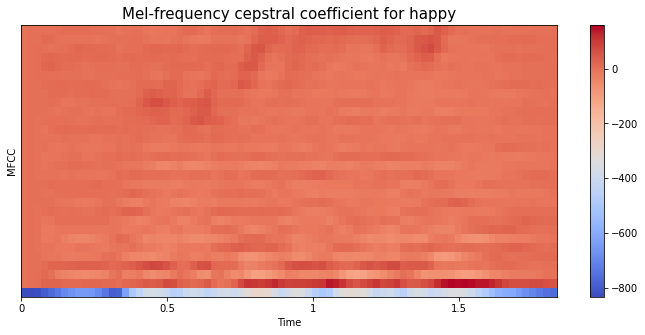

In [ ]:
emotion='happy'
path = np.array(data_path.Path[data_path.Emotions==emotion])[6]
data, sr = librosa.load(path,sr=16000, offset=0.5, duration=2.5, res_type='kaiser_fast')
create_mfcc(data,sr,emotion)

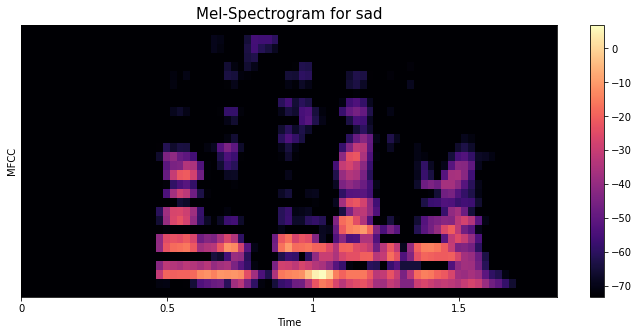

In [ ]:
emotion='sad'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sr = librosa.load(path,sr=16000, offset=0.5, duration=2.5, res_type='kaiser_fast')
create_mel_spec(data,sr,emotion)

In [ ]:
sampling_rate=16000
audio_duration=2.5
n_mfcc = 30
n_melspec = 30
n_fft=512
def prepare_data(df, n, mfcc ,mel):
    X = np.empty(shape=(df.shape[0], n,158,1))
    input_length = sampling_rate * audio_duration

    cnt = 0
    for fname in tqdm(df.Path):
        file_path = fname
        data, sr = librosa.load(file_path, sr=sampling_rate
                               ,res_type="kaiser_fast"
                               ,duration=2.5
                               ,offset=0.5
                              )

        if len(data)!= input_length:

        # Random offset / Padding
            data=match_dimension(data,40000)




          # which feature?
          # if mfcc == 1:
          #       # MFCC extraction
          #   MFCC = librosa.feature.mfcc(data, sr=sampling_rate, n_mfcc=n_mfcc)
          #   MFCC = np.expand_dims(MFCC, axis=-1)
          #   X[cnt,] = MFCC
          #   print('mfcc',MFCC.shape)

        if mfcc == 1 and mel== 0:
                  # MFCC extraction
              MFCC = librosa.feature.mfcc(data, sr=sampling_rate, n_mfcc=n_mfcc)
              MFCC = np.expand_dims(MFCC, axis=-1)
              X[cnt,] = MFCC
              print('mfcc',MFCC.shape)

        elif mfcc==0 and mel==1 :
                  # Log-melspectogram

              melspec = librosa.feature.melspectrogram(data,sr=sampling_rate, n_mels = n_melspec)
              logspec = librosa.amplitude_to_db(melspec)
              logspec = np.expand_dims(logspec, axis=-1)
              X[cnt,] = logspec

              print('mel',logspec.shape)

        elif mfcc==1 and mel== 1:
              MFCC = librosa.feature.mfcc(data, sr=sampling_rate, n_mfcc=n_mfcc)
              melspec = librosa.feature.melspectrogram(data,sr=sampling_rate, n_mels = n_melspec)
              logspec = librosa.amplitude_to_db(melspec)
              mfcc_logspec= np.concatenate((MFCC,logspec),axis=1)
              #mel_logspec= np.vstack([MFCC,logspec])
              #print(mfcc_logspec.shape)
              mfcc_logspec = np.expand_dims(mfcc_logspec, axis=-1)
              X[cnt,] = mfcc_logspec
              print('mfcc_logspec',mfcc_logspec.shape)

        cnt += 1

    return X

In [ ]:
mfcc_mel=prepare_data(data_path,n=30,mfcc=1,mel=1)

  0%|          | 4/4240 [00:00<03:51, 18.32it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  0%|          | 8/4240 [00:00<04:05, 17.26it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  0%|          | 12/4240 [00:00<04:02, 17.44it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  0%|          | 16/4240 [00:00<04:10, 16.86it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  0%|          | 20/4240 [00:01<04:21, 16.17it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  1%|          | 24/4240 [00:01<04:12, 16.69it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  1%|          | 28/4240 [00:01<04:10, 16.79it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  1%|          | 32/4240 [00:01<04:06, 17.06it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  1%|          | 36/4240 [00:02<04:12, 16.66it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  1%|          | 40/4240 [00:02<04:11, 16.70it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  1%|          | 44/4240 [00:02<04:10, 16.78it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  1%|          | 48/4240 [00:02<04:06, 17.03it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  1%|          | 52/4240 [00:03<04:06, 16.96it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  1%|▏         | 56/4240 [00:03<04:05, 17.01it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  1%|▏         | 60/4240 [00:03<04:03, 17.15it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  2%|▏         | 64/4240 [00:03<04:02, 17.24it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  2%|▏         | 68/4240 [00:04<04:05, 16.99it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  2%|▏         | 72/4240 [00:04<04:09, 16.69it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  2%|▏         | 76/4240 [00:04<04:11, 16.55it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  2%|▏         | 80/4240 [00:04<04:06, 16.84it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  2%|▏         | 84/4240 [00:04<04:01, 17.21it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  2%|▏         | 88/4240 [00:05<04:05, 16.89it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  2%|▏         | 92/4240 [00:05<04:03, 17.05it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  2%|▏         | 96/4240 [00:05<04:05, 16.88it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  2%|▏         | 100/4240 [00:05<04:05, 16.89it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  2%|▏         | 104/4240 [00:06<04:06, 16.78it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  3%|▎         | 108/4240 [00:06<04:08, 16.64it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  3%|▎         | 112/4240 [00:06<04:05, 16.84it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  3%|▎         | 116/4240 [00:06<04:07, 16.65it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  3%|▎         | 120/4240 [00:07<04:09, 16.50it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  3%|▎         | 124/4240 [00:07<04:01, 17.06it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  3%|▎         | 128/4240 [00:07<03:55, 17.46it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  3%|▎         | 132/4240 [00:07<03:54, 17.55it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  3%|▎         | 136/4240 [00:08<04:00, 17.08it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  3%|▎         | 140/4240 [00:08<04:04, 16.75it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  3%|▎         | 144/4240 [00:08<04:03, 16.79it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  3%|▎         | 148/4240 [00:08<04:07, 16.55it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  4%|▎         | 152/4240 [00:09<03:59, 17.04it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  4%|▎         | 156/4240 [00:09<04:02, 16.81it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  4%|▍         | 160/4240 [00:09<03:56, 17.25it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  4%|▍         | 164/4240 [00:09<03:54, 17.37it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  4%|▍         | 168/4240 [00:09<03:59, 16.99it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  4%|▍         | 172/4240 [00:10<04:06, 16.52it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  4%|▍         | 176/4240 [00:10<04:00, 16.87it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  4%|▍         | 180/4240 [00:10<04:03, 16.65it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  4%|▍         | 184/4240 [00:10<04:02, 16.71it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  4%|▍         | 188/4240 [00:11<03:53, 17.33it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  5%|▍         | 192/4240 [00:11<03:55, 17.18it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  5%|▍         | 196/4240 [00:11<03:53, 17.32it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  5%|▍         | 200/4240 [00:11<03:49, 17.60it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  5%|▍         | 204/4240 [00:12<03:55, 17.14it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  5%|▍         | 208/4240 [00:12<04:01, 16.71it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  5%|▌         | 212/4240 [00:12<03:59, 16.84it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  5%|▌         | 216/4240 [00:12<03:56, 17.01it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  5%|▌         | 220/4240 [00:13<04:06, 16.33it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  5%|▌         | 224/4240 [00:13<04:08, 16.17it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  5%|▌         | 228/4240 [00:13<03:57, 16.86it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  5%|▌         | 232/4240 [00:13<04:00, 16.69it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  6%|▌         | 236/4240 [00:13<03:55, 16.97it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  6%|▌         | 240/4240 [00:14<03:55, 17.00it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  6%|▌         | 244/4240 [00:14<03:57, 16.81it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  6%|▌         | 248/4240 [00:14<03:55, 16.99it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  6%|▌         | 252/4240 [00:14<03:59, 16.63it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  6%|▌         | 256/4240 [00:15<03:56, 16.83it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  6%|▌         | 260/4240 [00:15<04:00, 16.57it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  6%|▌         | 264/4240 [00:15<03:59, 16.63it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  6%|▋         | 268/4240 [00:15<03:56, 16.79it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  6%|▋         | 272/4240 [00:16<03:50, 17.18it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  7%|▋         | 276/4240 [00:16<03:59, 16.52it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  7%|▋         | 280/4240 [00:16<03:53, 16.98it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  7%|▋         | 284/4240 [00:16<03:51, 17.08it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  7%|▋         | 288/4240 [00:17<03:47, 17.37it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  7%|▋         | 292/4240 [00:17<03:45, 17.54it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  7%|▋         | 296/4240 [00:17<03:48, 17.30it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  7%|▋         | 300/4240 [00:17<03:52, 16.97it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  7%|▋         | 304/4240 [00:18<03:56, 16.66it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  7%|▋         | 308/4240 [00:18<03:48, 17.23it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  7%|▋         | 312/4240 [00:18<03:54, 16.76it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  7%|▋         | 316/4240 [00:18<04:11, 15.59it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  8%|▊         | 320/4240 [00:19<04:09, 15.73it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  8%|▊         | 324/4240 [00:19<04:02, 16.12it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  8%|▊         | 328/4240 [00:19<03:58, 16.41it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  8%|▊         | 332/4240 [00:19<03:52, 16.82it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  8%|▊         | 336/4240 [00:19<03:47, 17.13it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  8%|▊         | 340/4240 [00:20<03:45, 17.30it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  8%|▊         | 344/4240 [00:20<03:50, 16.91it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  8%|▊         | 348/4240 [00:20<03:53, 16.70it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  8%|▊         | 352/4240 [00:20<03:52, 16.73it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  8%|▊         | 356/4240 [00:21<03:53, 16.64it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  8%|▊         | 360/4240 [00:21<03:50, 16.82it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  9%|▊         | 364/4240 [00:21<03:51, 16.73it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  9%|▊         | 368/4240 [00:21<03:49, 16.86it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  9%|▉         | 372/4240 [00:22<03:50, 16.80it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  9%|▉         | 376/4240 [00:22<03:52, 16.63it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  9%|▉         | 380/4240 [00:22<03:55, 16.40it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  9%|▉         | 384/4240 [00:22<03:54, 16.44it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  9%|▉         | 388/4240 [00:23<03:49, 16.79it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  9%|▉         | 392/4240 [00:23<03:49, 16.79it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  9%|▉         | 396/4240 [00:23<03:54, 16.41it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  9%|▉         | 400/4240 [00:23<03:53, 16.43it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 10%|▉         | 404/4240 [00:24<03:49, 16.74it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 10%|▉         | 408/4240 [00:24<03:45, 17.02it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 10%|▉         | 412/4240 [00:24<03:50, 16.58it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 10%|▉         | 416/4240 [00:24<03:48, 16.77it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 10%|▉         | 420/4240 [00:24<03:43, 17.09it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 10%|█         | 424/4240 [00:25<03:45, 16.95it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 10%|█         | 428/4240 [00:25<03:43, 17.06it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 10%|█         | 432/4240 [00:25<03:50, 16.50it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 10%|█         | 436/4240 [00:25<03:51, 16.46it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 10%|█         | 440/4240 [00:26<03:47, 16.68it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 10%|█         | 444/4240 [00:26<03:42, 17.09it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 11%|█         | 448/4240 [00:26<03:47, 16.64it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 11%|█         | 452/4240 [00:26<03:48, 16.56it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 11%|█         | 456/4240 [00:27<03:46, 16.68it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 11%|█         | 460/4240 [00:27<03:48, 16.56it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 11%|█         | 464/4240 [00:27<03:45, 16.73it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 11%|█         | 468/4240 [00:27<03:50, 16.39it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 11%|█         | 472/4240 [00:28<03:48, 16.52it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 11%|█         | 476/4240 [00:28<03:44, 16.79it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 11%|█▏        | 480/4240 [00:28<03:47, 16.50it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 11%|█▏        | 484/4240 [00:28<03:50, 16.31it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 12%|█▏        | 488/4240 [00:29<03:56, 15.88it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 12%|█▏        | 492/4240 [00:29<03:53, 16.03it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 12%|█▏        | 496/4240 [00:29<03:54, 15.97it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 12%|█▏        | 500/4240 [00:29<03:55, 15.87it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 12%|█▏        | 504/4240 [00:30<03:56, 15.78it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 12%|█▏        | 508/4240 [00:30<03:51, 16.13it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 12%|█▏        | 512/4240 [00:30<03:49, 16.27it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 12%|█▏        | 516/4240 [00:30<03:50, 16.15it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 12%|█▏        | 520/4240 [00:31<03:46, 16.44it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 12%|█▏        | 524/4240 [00:31<03:40, 16.85it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 12%|█▏        | 528/4240 [00:31<03:36, 17.13it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 13%|█▎        | 532/4240 [00:31<03:38, 16.94it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 13%|█▎        | 536/4240 [00:32<03:37, 17.06it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 13%|█▎        | 540/4240 [00:32<03:38, 16.95it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 13%|█▎        | 544/4240 [00:32<03:40, 16.73it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 13%|█▎        | 548/4240 [00:32<03:45, 16.37it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 13%|█▎        | 552/4240 [00:33<03:40, 16.70it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 13%|█▎        | 556/4240 [00:33<03:42, 16.54it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 13%|█▎        | 560/4240 [00:33<03:44, 16.38it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 13%|█▎        | 564/4240 [00:33<03:55, 15.63it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 13%|█▎        | 568/4240 [00:34<03:49, 16.01it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 13%|█▎        | 572/4240 [00:34<03:44, 16.31it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 14%|█▎        | 576/4240 [00:34<03:45, 16.22it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 14%|█▎        | 580/4240 [00:34<03:43, 16.40it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 14%|█▍        | 584/4240 [00:35<03:49, 15.91it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 14%|█▍        | 588/4240 [00:35<03:47, 16.05it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 14%|█▍        | 592/4240 [00:35<03:47, 16.02it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 14%|█▍        | 596/4240 [00:35<03:45, 16.17it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 14%|█▍        | 600/4240 [00:36<03:44, 16.20it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 14%|█▍        | 604/4240 [00:36<03:48, 15.90it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 14%|█▍        | 608/4240 [00:36<03:45, 16.14it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 14%|█▍        | 612/4240 [00:36<03:46, 16.01it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 14%|█▍        | 614/4240 [00:36<03:50, 15.70it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 15%|█▍        | 620/4240 [00:37<03:44, 16.16it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 15%|█▍        | 624/4240 [00:37<03:39, 16.50it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 15%|█▍        | 628/4240 [00:37<03:32, 16.97it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 15%|█▍        | 632/4240 [00:37<03:43, 16.14it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 15%|█▌        | 636/4240 [00:38<03:38, 16.53it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 15%|█▌        | 640/4240 [00:38<03:37, 16.55it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 15%|█▌        | 644/4240 [00:38<03:36, 16.59it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 15%|█▌        | 648/4240 [00:38<03:43, 16.10it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 15%|█▌        | 652/4240 [00:39<03:36, 16.59it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 15%|█▌        | 656/4240 [00:39<03:30, 17.02it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 16%|█▌        | 660/4240 [00:39<03:29, 17.09it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 16%|█▌        | 664/4240 [00:39<03:34, 16.66it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 16%|█▌        | 668/4240 [00:40<03:33, 16.76it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 16%|█▌        | 672/4240 [00:40<03:35, 16.58it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 16%|█▌        | 676/4240 [00:40<03:33, 16.68it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 16%|█▌        | 680/4240 [00:40<03:36, 16.44it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 16%|█▌        | 684/4240 [00:41<03:37, 16.32it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 16%|█▌        | 688/4240 [00:41<03:34, 16.57it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 16%|█▋        | 692/4240 [00:41<03:29, 16.90it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 16%|█▋        | 696/4240 [00:41<03:26, 17.19it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 17%|█▋        | 700/4240 [00:42<03:27, 17.07it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 17%|█▋        | 704/4240 [00:42<03:26, 17.14it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 17%|█▋        | 708/4240 [00:42<03:27, 16.99it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 17%|█▋        | 712/4240 [00:42<03:24, 17.21it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 17%|█▋        | 716/4240 [00:43<03:28, 16.89it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 17%|█▋        | 720/4240 [00:43<03:28, 16.88it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 17%|█▋        | 724/4240 [00:43<03:25, 17.08it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 17%|█▋        | 728/4240 [00:43<03:31, 16.61it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 17%|█▋        | 732/4240 [00:43<03:29, 16.77it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 17%|█▋        | 736/4240 [00:44<03:32, 16.49it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 17%|█▋        | 740/4240 [00:44<03:35, 16.24it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 18%|█▊        | 744/4240 [00:44<03:35, 16.20it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 18%|█▊        | 748/4240 [00:44<03:33, 16.39it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 18%|█▊        | 752/4240 [00:45<03:36, 16.14it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 18%|█▊        | 756/4240 [00:45<03:30, 16.54it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 18%|█▊        | 760/4240 [00:45<03:26, 16.83it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 18%|█▊        | 764/4240 [00:45<03:28, 16.71it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 18%|█▊        | 768/4240 [00:46<03:26, 16.83it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 18%|█▊        | 772/4240 [00:46<03:26, 16.81it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 18%|█▊        | 776/4240 [00:46<03:25, 16.86it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 18%|█▊        | 780/4240 [00:46<03:24, 16.94it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 18%|█▊        | 784/4240 [00:47<03:23, 16.95it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 19%|█▊        | 788/4240 [00:47<03:24, 16.85it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 19%|█▊        | 792/4240 [00:47<03:23, 16.97it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 19%|█▉        | 796/4240 [00:47<03:20, 17.16it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 19%|█▉        | 800/4240 [00:48<03:24, 16.78it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 19%|█▉        | 804/4240 [00:48<03:26, 16.61it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 19%|█▉        | 808/4240 [00:48<03:26, 16.64it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 19%|█▉        | 812/4240 [00:48<03:23, 16.87it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 19%|█▉        | 816/4240 [00:49<03:26, 16.55it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 19%|█▉        | 820/4240 [00:49<03:39, 15.59it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 19%|█▉        | 824/4240 [00:49<03:40, 15.52it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 20%|█▉        | 828/4240 [00:49<03:36, 15.73it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 20%|█▉        | 832/4240 [00:50<03:34, 15.87it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 20%|█▉        | 836/4240 [00:50<03:30, 16.20it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 20%|█▉        | 840/4240 [00:50<03:22, 16.77it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 20%|█▉        | 844/4240 [00:50<03:24, 16.63it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 20%|██        | 848/4240 [00:51<03:25, 16.54it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 20%|██        | 852/4240 [00:51<03:29, 16.18it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 20%|██        | 856/4240 [00:51<03:25, 16.49it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 20%|██        | 860/4240 [00:51<03:20, 16.82it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 20%|██        | 864/4240 [00:51<03:18, 16.97it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 20%|██        | 868/4240 [00:52<03:24, 16.45it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 21%|██        | 872/4240 [00:52<03:21, 16.70it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 21%|██        | 876/4240 [00:52<03:25, 16.38it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 21%|██        | 880/4240 [00:52<03:22, 16.56it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 21%|██        | 884/4240 [00:53<03:22, 16.55it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 21%|██        | 888/4240 [00:53<03:23, 16.50it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 21%|██        | 892/4240 [00:53<03:22, 16.50it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 21%|██        | 896/4240 [00:53<03:23, 16.44it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 21%|██        | 900/4240 [00:54<03:27, 16.11it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 21%|██▏       | 904/4240 [00:54<03:24, 16.34it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 21%|██▏       | 908/4240 [00:54<03:21, 16.52it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 22%|██▏       | 912/4240 [00:54<03:19, 16.66it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 22%|██▏       | 916/4240 [00:55<03:18, 16.73it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 22%|██▏       | 920/4240 [00:55<03:21, 16.52it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 22%|██▏       | 924/4240 [00:55<03:18, 16.70it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 22%|██▏       | 926/4240 [00:56<05:30, 10.03it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 22%|██▏       | 928/4240 [00:56<06:47,  8.12it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 22%|██▏       | 930/4240 [00:56<06:23,  8.63it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 22%|██▏       | 934/4240 [00:56<04:53, 11.25it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 22%|██▏       | 936/4240 [00:56<04:26, 12.38it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 22%|██▏       | 938/4240 [00:57<05:32,  9.94it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 22%|██▏       | 941/4240 [00:57<07:28,  7.35it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 22%|██▏       | 945/4240 [00:58<05:12, 10.53it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 22%|██▏       | 949/4240 [00:58<04:13, 13.00it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec 

 22%|██▏       | 953/4240 [00:58<03:52, 14.13it/s]

(30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 23%|██▎       | 957/4240 [00:58<03:35, 15.24it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 23%|██▎       | 961/4240 [00:59<03:22, 16.17it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 23%|██▎       | 965/4240 [00:59<03:22, 16.18it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 23%|██▎       | 969/4240 [00:59<03:19, 16.36it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 23%|██▎       | 973/4240 [00:59<03:18, 16.44it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 23%|██▎       | 977/4240 [01:00<03:18, 16.48it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 23%|██▎       | 981/4240 [01:00<03:16, 16.59it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 23%|██▎       | 985/4240 [01:00<03:18, 16.41it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 23%|██▎       | 989/4240 [01:00<03:12, 16.86it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 23%|██▎       | 993/4240 [01:00<03:10, 17.01it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 24%|██▎       | 997/4240 [01:01<03:10, 17.03it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 24%|██▎       | 1001/4240 [01:01<03:12, 16.81it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 24%|██▎       | 1005/4240 [01:01<03:12, 16.79it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 24%|██▍       | 1009/4240 [01:01<03:12, 16.80it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 24%|██▍       | 1013/4240 [01:02<03:10, 16.98it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 24%|██▍       | 1017/4240 [01:02<03:17, 16.29it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 24%|██▍       | 1021/4240 [01:02<03:18, 16.18it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 24%|██▍       | 1025/4240 [01:02<03:13, 16.61it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 24%|██▍       | 1029/4240 [01:03<03:14, 16.55it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 24%|██▍       | 1033/4240 [01:03<03:10, 16.81it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 24%|██▍       | 1037/4240 [01:03<03:09, 16.87it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 25%|██▍       | 1041/4240 [01:03<03:13, 16.50it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 25%|██▍       | 1045/4240 [01:04<03:16, 16.27it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 25%|██▍       | 1049/4240 [01:04<03:10, 16.77it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 25%|██▍       | 1053/4240 [01:04<03:13, 16.51it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 25%|██▍       | 1057/4240 [01:04<03:22, 15.69it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 25%|██▌       | 1061/4240 [01:05<03:17, 16.12it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 25%|██▌       | 1065/4240 [01:05<03:16, 16.17it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 25%|██▌       | 1069/4240 [01:05<03:20, 15.80it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 25%|██▌       | 1073/4240 [01:05<03:15, 16.17it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 25%|██▌       | 1077/4240 [01:06<03:18, 15.93it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 25%|██▌       | 1081/4240 [01:06<03:14, 16.22it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 26%|██▌       | 1085/4240 [01:06<03:16, 16.09it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 26%|██▌       | 1089/4240 [01:06<03:14, 16.20it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 26%|██▌       | 1093/4240 [01:07<03:13, 16.23it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 26%|██▌       | 1097/4240 [01:07<03:10, 16.53it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 26%|██▌       | 1101/4240 [01:07<03:16, 15.95it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 26%|██▌       | 1105/4240 [01:07<03:14, 16.12it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 26%|██▌       | 1109/4240 [01:08<03:10, 16.46it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 26%|██▋       | 1113/4240 [01:08<03:04, 16.94it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 26%|██▋       | 1117/4240 [01:08<03:12, 16.20it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 26%|██▋       | 1121/4240 [01:08<03:10, 16.37it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 27%|██▋       | 1125/4240 [01:09<03:07, 16.60it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 27%|██▋       | 1129/4240 [01:09<03:04, 16.84it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 27%|██▋       | 1133/4240 [01:09<03:05, 16.74it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 27%|██▋       | 1137/4240 [01:09<03:05, 16.73it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 27%|██▋       | 1141/4240 [01:10<03:03, 16.84it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 27%|██▋       | 1145/4240 [01:10<03:02, 16.91it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 27%|██▋       | 1149/4240 [01:10<03:00, 17.08it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 27%|██▋       | 1153/4240 [01:10<03:04, 16.70it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 27%|██▋       | 1157/4240 [01:10<03:08, 16.39it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 27%|██▋       | 1161/4240 [01:11<03:05, 16.56it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 27%|██▋       | 1165/4240 [01:11<03:04, 16.70it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 28%|██▊       | 1169/4240 [01:11<03:04, 16.65it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 28%|██▊       | 1173/4240 [01:11<03:06, 16.43it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 28%|██▊       | 1177/4240 [01:12<03:06, 16.46it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 28%|██▊       | 1181/4240 [01:12<03:04, 16.55it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 28%|██▊       | 1185/4240 [01:12<03:09, 16.10it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 28%|██▊       | 1189/4240 [01:12<03:08, 16.22it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 28%|██▊       | 1193/4240 [01:13<03:15, 15.58it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 28%|██▊       | 1197/4240 [01:13<03:09, 16.03it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 28%|██▊       | 1201/4240 [01:13<03:09, 16.08it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 28%|██▊       | 1205/4240 [01:13<03:05, 16.37it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 29%|██▊       | 1209/4240 [01:14<03:02, 16.65it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 29%|██▊       | 1213/4240 [01:14<02:57, 17.01it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 29%|██▊       | 1217/4240 [01:14<03:02, 16.59it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 29%|██▉       | 1221/4240 [01:14<03:06, 16.22it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 29%|██▉       | 1225/4240 [01:15<03:00, 16.74it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 29%|██▉       | 1229/4240 [01:15<03:00, 16.69it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 29%|██▉       | 1233/4240 [01:15<03:00, 16.62it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 29%|██▉       | 1237/4240 [01:15<03:07, 16.05it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 29%|██▉       | 1241/4240 [01:16<03:05, 16.19it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 29%|██▉       | 1245/4240 [01:16<03:03, 16.33it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 29%|██▉       | 1249/4240 [01:16<02:59, 16.70it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 30%|██▉       | 1253/4240 [01:16<02:58, 16.70it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 30%|██▉       | 1257/4240 [01:17<03:00, 16.51it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 30%|██▉       | 1261/4240 [01:17<02:56, 16.86it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 30%|██▉       | 1265/4240 [01:17<02:55, 16.99it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 30%|██▉       | 1269/4240 [01:17<03:01, 16.40it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 30%|███       | 1273/4240 [01:18<02:58, 16.62it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 30%|███       | 1277/4240 [01:18<02:56, 16.75it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 30%|███       | 1281/4240 [01:18<02:55, 16.89it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 30%|███       | 1285/4240 [01:18<03:00, 16.36it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 30%|███       | 1289/4240 [01:19<03:07, 15.70it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 30%|███       | 1293/4240 [01:19<03:04, 15.97it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 31%|███       | 1297/4240 [01:19<03:00, 16.31it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 31%|███       | 1301/4240 [01:19<03:00, 16.26it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 31%|███       | 1305/4240 [01:20<03:01, 16.15it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 31%|███       | 1309/4240 [01:20<03:05, 15.84it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 31%|███       | 1313/4240 [01:20<03:03, 15.99it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 31%|███       | 1317/4240 [01:20<02:58, 16.35it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 31%|███       | 1321/4240 [01:21<02:59, 16.24it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 31%|███▏      | 1325/4240 [01:21<02:53, 16.81it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 31%|███▏      | 1329/4240 [01:21<02:54, 16.66it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 31%|███▏      | 1333/4240 [01:21<02:54, 16.67it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 32%|███▏      | 1337/4240 [01:21<02:56, 16.45it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 32%|███▏      | 1341/4240 [01:22<02:58, 16.26it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 32%|███▏      | 1345/4240 [01:22<02:57, 16.32it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 32%|███▏      | 1349/4240 [01:22<02:54, 16.60it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 32%|███▏      | 1353/4240 [01:22<02:54, 16.56it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 32%|███▏      | 1357/4240 [01:23<02:50, 16.89it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 32%|███▏      | 1361/4240 [01:23<02:51, 16.74it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 32%|███▏      | 1365/4240 [01:23<02:57, 16.16it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 32%|███▏      | 1369/4240 [01:23<03:02, 15.77it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 32%|███▏      | 1373/4240 [01:24<03:00, 15.88it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 32%|███▏      | 1377/4240 [01:24<03:00, 15.87it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 33%|███▎      | 1381/4240 [01:24<02:57, 16.07it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 33%|███▎      | 1385/4240 [01:24<02:57, 16.04it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 33%|███▎      | 1389/4240 [01:25<03:04, 15.43it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 33%|███▎      | 1393/4240 [01:25<03:01, 15.71it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 33%|███▎      | 1397/4240 [01:25<02:57, 16.03it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 33%|███▎      | 1401/4240 [01:25<03:00, 15.75it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 33%|███▎      | 1405/4240 [01:26<02:59, 15.79it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 33%|███▎      | 1409/4240 [01:26<02:57, 15.92it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 33%|███▎      | 1413/4240 [01:26<03:00, 15.64it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 33%|███▎      | 1417/4240 [01:27<03:01, 15.56it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 34%|███▎      | 1421/4240 [01:27<02:51, 16.46it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 34%|███▎      | 1425/4240 [01:27<02:51, 16.40it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 34%|███▎      | 1429/4240 [01:27<02:50, 16.45it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 34%|███▍      | 1433/4240 [01:27<02:45, 16.97it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 34%|███▍      | 1437/4240 [01:28<02:53, 16.17it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 34%|███▍      | 1441/4240 [01:28<02:49, 16.53it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 34%|███▍      | 1447/4240 [01:28<02:17, 20.24it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 34%|███▍      | 1453/4240 [01:28<02:04, 22.45it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 34%|███▍      | 1459/4240 [01:29<02:00, 23.11it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 35%|███▍      | 1465/4240 [01:29<01:58, 23.33it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 35%|███▍      | 1471/4240 [01:29<01:58, 23.36it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 35%|███▍      | 1477/4240 [01:30<01:56, 23.65it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 35%|███▍      | 1480/4240 [01:30<01:55, 23.80it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 35%|███▌      | 1486/4240 [01:30<01:50, 24.84it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 35%|███▌      | 1492/4240 [01:30<01:50, 24.86it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 35%|███▌      | 1498/4240 [01:30<01:47, 25.60it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 35%|███▌      | 1504/4240 [01:31<01:45, 26.04it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 36%|███▌      | 1510/4240 [01:31<01:45, 25.77it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 36%|███▌      | 1516/4240 [01:31<01:48, 25.10it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 36%|███▌      | 1522/4240 [01:31<01:48, 25.05it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 36%|███▌      | 1528/4240 [01:32<01:49, 24.82it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 36%|███▌      | 1534/4240 [01:32<01:48, 24.93it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)

 36%|███▋      | 1537/4240 [01:32<01:50, 24.39it/s]


mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 36%|███▋      | 1543/4240 [01:32<01:51, 24.10it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 37%|███▋      | 1549/4240 [01:32<01:47, 25.00it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 37%|███▋      | 1555/4240 [01:33<01:47, 25.07it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 37%|███▋      | 1561/4240 [01:33<01:45, 25.38it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 37%|███▋      | 1567/4240 [01:33<01:42, 26.11it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 37%|███▋      | 1573/4240 [01:33<01:40, 26.67it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 37%|███▋      | 1579/4240 [01:34<01:40, 26.53it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 37%|███▋      | 1585/4240 [01:34<01:45, 25.25it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 38%|███▊      | 1591/4240 [01:34<01:40, 26.23it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 38%|███▊      | 1597/4240 [01:34<01:38, 26.92it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 38%|███▊      | 1603/4240 [01:34<01:40, 26.28it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 38%|███▊      | 1609/4240 [01:35<01:39, 26.34it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 38%|███▊      | 1615/4240 [01:35<01:43, 25.42it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 38%|███▊      | 1621/4240 [01:35<01:41, 25.76it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 38%|███▊      | 1627/4240 [01:35<01:42, 25.62it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 39%|███▊      | 1633/4240 [01:36<01:38, 26.39it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 39%|███▊      | 1636/4240 [01:36<01:43, 25.22it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 39%|███▉      | 1643/4240 [01:36<01:38, 26.44it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 39%|███▉      | 1650/4240 [01:36<01:28, 29.15it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 39%|███▉      | 1658/4240 [01:36<01:25, 30.13it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 39%|███▉      | 1666/4240 [01:37<01:26, 29.87it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 39%|███▉      | 1672/4240 [01:37<01:29, 28.79it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 40%|███▉      | 1679/4240 [01:37<01:25, 30.05it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 40%|███▉      | 1685/4240 [01:37<01:26, 29.57it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 40%|███▉      | 1692/4240 [01:38<01:24, 30.14it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 40%|████      | 1696/4240 [01:38<01:27, 28.94it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 40%|████      | 1703/4240 [01:38<01:25, 29.51it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 40%|████      | 1711/4240 [01:38<01:21, 31.10it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 41%|████      | 1719/4240 [01:39<01:20, 31.30it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 41%|████      | 1723/4240 [01:39<01:21, 30.82it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 41%|████      | 1731/4240 [01:39<01:23, 30.22it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 41%|████      | 1739/4240 [01:39<01:23, 29.94it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 41%|████      | 1746/4240 [01:39<01:23, 29.75it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 41%|████▏     | 1752/4240 [01:40<01:23, 29.62it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 41%|████▏     | 1758/4240 [01:40<01:27, 28.53it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 42%|████▏     | 1765/4240 [01:40<01:22, 29.98it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 42%|████▏     | 1769/4240 [01:40<01:21, 30.37it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 42%|████▏     | 1777/4240 [01:40<01:22, 29.83it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 42%|████▏     | 1784/4240 [01:41<01:22, 29.89it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 42%|████▏     | 1790/4240 [01:41<01:27, 28.16it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 42%|████▏     | 1797/4240 [01:41<01:21, 29.86it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 43%|████▎     | 1805/4240 [01:41<01:18, 30.87it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 43%|████▎     | 1809/4240 [01:42<01:16, 31.59it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 43%|████▎     | 1817/4240 [01:42<01:17, 31.08it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 43%|████▎     | 1825/4240 [01:42<01:19, 30.46it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 43%|████▎     | 1829/4240 [01:42<01:21, 29.65it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 43%|████▎     | 1836/4240 [01:42<01:20, 29.99it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 43%|████▎     | 1843/4240 [01:43<01:22, 29.02it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 44%|████▎     | 1849/4240 [01:43<01:30, 26.55it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec

 44%|████▍     | 1855/4240 [01:43<01:29, 26.54it/s]

 (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 44%|████▍     | 1861/4240 [01:43<01:29, 26.69it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 44%|████▍     | 1867/4240 [01:44<01:31, 25.94it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 44%|████▍     | 1873/4240 [01:44<01:30, 26.11it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 44%|████▍     | 1879/4240 [01:44<01:34, 24.97it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 44%|████▍     | 1885/4240 [01:44<01:34, 24.98it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 45%|████▍     | 1891/4240 [01:45<01:34, 24.93it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 45%|████▍     | 1897/4240 [01:45<01:33, 25.17it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 45%|████▍     | 1900/4240 [01:45<01:39, 23.54it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 45%|████▍     | 1906/4240 [01:45<01:35, 24.32it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)

 45%|████▌     | 1912/4240 [01:45<01:34, 24.73it/s]


mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 45%|████▌     | 1918/4240 [01:46<01:31, 25.30it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 45%|████▌     | 1924/4240 [01:46<01:30, 25.52it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 45%|████▌     | 1927/4240 [01:46<01:36, 23.93it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 46%|████▌     | 1933/4240 [01:46<01:32, 24.90it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 46%|████▌     | 1939/4240 [01:47<01:30, 25.36it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 46%|████▌     | 1945/4240 [01:47<01:27, 26.30it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 46%|████▌     | 1951/4240 [01:47<01:26, 26.36it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 46%|████▌     | 1957/4240 [01:47<01:30, 25.24it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 46%|████▋     | 1963/4240 [01:47<01:27, 25.91it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 46%|████▋     | 1969/4240 [01:48<01:27, 25.83it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec

 47%|████▋     | 1975/4240 [01:48<01:29, 25.40it/s]

 (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 47%|████▋     | 1981/4240 [01:48<01:30, 25.08it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 47%|████▋     | 1987/4240 [01:48<01:27, 25.86it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 47%|████▋     | 1993/4240 [01:49<01:29, 25.23it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 47%|████▋     | 1999/4240 [01:49<01:27, 25.59it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 47%|████▋     | 2005/4240 [01:49<01:29, 25.10it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 47%|████▋     | 2011/4240 [01:49<01:27, 25.53it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 48%|████▊     | 2017/4240 [01:50<01:26, 25.72it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 48%|████▊     | 2023/4240 [01:50<01:27, 25.22it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 48%|████▊     | 2026/4240 [01:50<01:33, 23.70it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 48%|████▊     | 2032/4240 [01:50<01:33, 23.57it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 48%|████▊     | 2038/4240 [01:51<01:30, 24.28it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 48%|████▊     | 2045/4240 [01:51<01:18, 27.86it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 48%|████▊     | 2053/4240 [01:51<01:11, 30.42it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 49%|████▊     | 2061/4240 [01:51<01:09, 31.26it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 49%|████▊     | 2065/4240 [01:51<01:08, 31.79it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 49%|████▉     | 2073/4240 [01:52<01:06, 32.55it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 49%|████▉     | 2081/4240 [01:52<01:08, 31.62it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 49%|████▉     | 2089/4240 [01:52<01:06, 32.53it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 49%|████▉     | 2097/4240 [01:52<01:02, 34.52it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 50%|████▉     | 2101/4240 [01:52<01:01, 34.90it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 50%|████▉     | 2109/4240 [01:53<01:01, 34.46it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec

 50%|████▉     | 2117/4240 [01:53<01:01, 34.63it/s]

 (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 50%|█████     | 2125/4240 [01:53<01:03, 33.13it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 50%|█████     | 2133/4240 [01:53<01:02, 33.95it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 50%|█████     | 2141/4240 [01:54<00:59, 35.01it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 51%|█████     | 2149/4240 [01:54<01:00, 34.45it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 51%|█████     | 2157/4240 [01:54<00:58, 35.32it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 51%|█████     | 2161/4240 [01:54<00:58, 35.38it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 51%|█████     | 2169/4240 [01:54<01:00, 34.26it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 51%|█████▏    | 2177/4240 [01:55<00:58, 35.01it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 52%|█████▏    | 2185/4240 [01:55<00:59, 34.55it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 52%|█████▏    | 2193/4240 [01:55<00:59, 34.56it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 52%|█████▏    | 2201/4240 [01:55<01:02, 32.51it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 52%|█████▏    | 2209/4240 [01:56<01:00, 33.57it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 52%|█████▏    | 2217/4240 [01:56<00:58, 34.40it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 52%|█████▏    | 2221/4240 [01:56<00:59, 33.91it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 53%|█████▎    | 2229/4240 [01:56<01:00, 33.47it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 53%|█████▎    | 2237/4240 [01:56<01:00, 33.18it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 53%|█████▎    | 2241/4240 [01:57<01:03, 31.29it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 53%|█████▎    | 2248/4240 [01:57<01:09, 28.59it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 53%|█████▎    | 2254/4240 [01:57<01:12, 27.51it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 53%|█████▎    | 2260/4240 [01:57<01:18, 25.27it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 53%|█████▎    | 2266/4240 [01:58<01:15, 26.18it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 54%|█████▎    | 2272/4240 [01:58<01:13, 26.90it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 54%|█████▎    | 2278/4240 [01:58<01:12, 27.21it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 54%|█████▍    | 2284/4240 [01:58<01:14, 26.40it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 54%|█████▍    | 2290/4240 [01:58<01:13, 26.54it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 54%|█████▍    | 2296/4240 [01:59<01:12, 26.87it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 54%|█████▍    | 2302/4240 [01:59<01:12, 26.69it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 54%|█████▍    | 2308/4240 [01:59<01:10, 27.36it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 55%|█████▍    | 2314/4240 [01:59<01:11, 26.77it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 55%|█████▍    | 2320/4240 [02:00<01:12, 26.60it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 55%|█████▍    | 2326/4240 [02:00<01:10, 27.17it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 55%|█████▌    | 2332/4240 [02:00<01:10, 27.04it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 55%|█████▌    | 2338/4240 [02:00<01:12, 26.37it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 55%|█████▌    | 2344/4240 [02:01<01:13, 25.84it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 55%|█████▌    | 2350/4240 [02:01<01:10, 26.71it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 56%|█████▌    | 2356/4240 [02:01<01:11, 26.22it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 56%|█████▌    | 2362/4240 [02:01<01:09, 26.94it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 56%|█████▌    | 2368/4240 [02:01<01:10, 26.45it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 56%|█████▌    | 2374/4240 [02:02<01:09, 26.77it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 56%|█████▌    | 2380/4240 [02:02<01:08, 26.98it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 56%|█████▋    | 2386/4240 [02:02<01:12, 25.56it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 56%|█████▋    | 2392/4240 [02:02<01:09, 26.47it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 57%|█████▋    | 2398/4240 [02:03<01:11, 25.86it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 57%|█████▋    | 2404/4240 [02:03<01:12, 25.38it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 57%|█████▋    | 2410/4240 [02:03<01:13, 24.73it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 57%|█████▋    | 2416/4240 [02:03<01:13, 24.81it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 57%|█████▋    | 2422/4240 [02:04<01:13, 24.68it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 57%|█████▋    | 2428/4240 [02:04<01:10, 25.85it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 57%|█████▋    | 2434/4240 [02:04<01:07, 26.87it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 58%|█████▊    | 2440/4240 [02:04<01:07, 26.52it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 58%|█████▊    | 2446/4240 [02:04<01:05, 27.48it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 58%|█████▊    | 2452/4240 [02:05<01:04, 27.75it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 58%|█████▊    | 2458/4240 [02:05<01:04, 27.43it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 58%|█████▊    | 2464/4240 [02:05<01:03, 27.76it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 58%|█████▊    | 2471/4240 [02:05<01:00, 29.48it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 58%|█████▊    | 2477/4240 [02:06<01:03, 27.97it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 59%|█████▊    | 2483/4240 [02:06<01:02, 28.11it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 59%|█████▊    | 2490/4240 [02:06<01:00, 28.82it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 59%|█████▉    | 2496/4240 [02:06<01:02, 27.71it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 59%|█████▉    | 2502/4240 [02:06<01:01, 28.29it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 59%|█████▉    | 2508/4240 [02:07<01:01, 27.99it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 59%|█████▉    | 2514/4240 [02:07<00:59, 28.78it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 59%|█████▉    | 2521/4240 [02:07<00:58, 29.29it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 60%|█████▉    | 2528/4240 [02:07<00:57, 29.81it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 60%|█████▉    | 2534/4240 [02:08<00:57, 29.47it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 60%|█████▉    | 2540/4240 [02:08<01:01, 27.74it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 60%|██████    | 2546/4240 [02:08<01:00, 27.87it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 60%|██████    | 2549/4240 [02:08<01:02, 26.99it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 60%|██████    | 2556/4240 [02:08<01:01, 27.37it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 60%|██████    | 2563/4240 [02:09<00:58, 28.80it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 61%|██████    | 2569/4240 [02:09<00:59, 28.09it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 61%|██████    | 2576/4240 [02:09<00:56, 29.50it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 61%|██████    | 2583/4240 [02:09<00:55, 29.68it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 61%|██████    | 2590/4240 [02:09<00:54, 30.08it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 61%|██████    | 2596/4240 [02:10<00:55, 29.57it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 61%|██████▏   | 2603/4240 [02:10<00:54, 30.26it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 61%|██████▏   | 2607/4240 [02:10<00:52, 30.97it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 62%|██████▏   | 2615/4240 [02:10<00:51, 31.29it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 62%|██████▏   | 2623/4240 [02:11<00:53, 30.11it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 62%|██████▏   | 2627/4240 [02:11<00:54, 29.33it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 62%|██████▏   | 2633/4240 [02:11<00:55, 29.00it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 62%|██████▏   | 2640/4240 [02:11<00:53, 29.67it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 62%|██████▏   | 2648/4240 [02:11<00:51, 30.90it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 63%|██████▎   | 2656/4240 [02:12<00:49, 31.86it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 63%|██████▎   | 2660/4240 [02:12<00:52, 30.25it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 63%|██████▎   | 2668/4240 [02:12<00:51, 30.79it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 63%|██████▎   | 2676/4240 [02:12<00:49, 31.66it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 63%|██████▎   | 2684/4240 [02:13<00:50, 30.82it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 63%|██████▎   | 2688/4240 [02:13<00:53, 29.00it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 64%|██████▎   | 2694/4240 [02:13<00:56, 27.48it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 64%|██████▎   | 2701/4240 [02:13<00:53, 28.98it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 64%|██████▍   | 2709/4240 [02:13<00:51, 29.69it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 64%|██████▍   | 2713/4240 [02:14<00:51, 29.74it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 64%|██████▍   | 2719/4240 [02:14<00:53, 28.52it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 64%|██████▍   | 2725/4240 [02:14<00:52, 28.81it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 64%|██████▍   | 2732/4240 [02:14<00:51, 29.33it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 65%|██████▍   | 2738/4240 [02:14<00:51, 28.97it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec

 65%|██████▍   | 2745/4240 [02:15<00:49, 29.97it/s]

 (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 65%|██████▍   | 2752/4240 [02:15<00:49, 29.90it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 65%|██████▌   | 2756/4240 [02:15<00:48, 30.37it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 65%|██████▌   | 2763/4240 [02:15<00:50, 29.11it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 65%|██████▌   | 2770/4240 [02:16<00:49, 29.43it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 66%|██████▌   | 2778/4240 [02:16<00:48, 30.16it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 66%|██████▌   | 2782/4240 [02:16<00:49, 29.46it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 66%|██████▌   | 2790/4240 [02:16<00:48, 30.05it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 66%|██████▌   | 2798/4240 [02:16<00:48, 29.72it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 66%|██████▌   | 2804/4240 [02:17<00:50, 28.35it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 66%|██████▌   | 2807/4240 [02:17<00:54, 26.31it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 66%|██████▋   | 2814/4240 [02:17<00:50, 28.12it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 67%|██████▋   | 2821/4240 [02:17<00:50, 28.20it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 67%|██████▋   | 2827/4240 [02:18<00:49, 28.54it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 67%|██████▋   | 2833/4240 [02:18<00:49, 28.16it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 67%|██████▋   | 2840/4240 [02:18<00:49, 28.35it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec 

 67%|██████▋   | 2846/4240 [02:18<00:50, 27.42it/s]

(30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 67%|██████▋   | 2852/4240 [02:18<00:52, 26.61it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 67%|██████▋   | 2858/4240 [02:19<00:51, 26.84it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 68%|██████▊   | 2864/4240 [02:19<00:54, 25.44it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 68%|██████▊   | 2870/4240 [02:19<00:51, 26.57it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 68%|██████▊   | 2876/4240 [02:19<00:49, 27.55it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 68%|██████▊   | 2882/4240 [02:20<00:48, 28.27it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 68%|██████▊   | 2888/4240 [02:20<00:48, 27.85it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 68%|██████▊   | 2895/4240 [02:20<00:48, 27.93it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 68%|██████▊   | 2901/4240 [02:20<00:47, 28.10it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 69%|██████▊   | 2907/4240 [02:20<00:47, 28.05it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 69%|██████▊   | 2913/4240 [02:21<00:48, 27.48it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 69%|██████▉   | 2919/4240 [02:21<00:48, 27.07it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 69%|██████▉   | 2925/4240 [02:21<00:50, 26.24it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 69%|██████▉   | 2931/4240 [02:21<00:50, 25.82it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 69%|██████▉   | 2937/4240 [02:22<00:49, 26.10it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 69%|██████▉   | 2943/4240 [02:22<00:50, 25.77it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 70%|██████▉   | 2949/4240 [02:22<00:48, 26.65it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 70%|██████▉   | 2952/4240 [02:22<00:51, 25.00it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 70%|██████▉   | 2958/4240 [02:23<00:53, 23.80it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 70%|██████▉   | 2964/4240 [02:23<00:52, 24.25it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 70%|███████   | 2970/4240 [02:23<00:53, 23.62it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 70%|███████   | 2973/4240 [02:23<00:53, 23.78it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 70%|███████   | 2982/4240 [02:23<00:49, 25.23it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 70%|███████   | 2988/4240 [02:24<00:48, 25.82it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 71%|███████   | 2994/4240 [02:24<00:47, 26.44it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 71%|███████   | 3000/4240 [02:24<00:47, 26.18it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 71%|███████   | 3003/4240 [02:24<00:49, 25.12it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 71%|███████   | 3009/4240 [02:25<00:49, 24.72it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 71%|███████   | 3015/4240 [02:25<00:48, 25.48it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 71%|███████▏  | 3021/4240 [02:25<00:46, 26.16it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 71%|███████▏  | 3027/4240 [02:25<00:45, 26.52it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 72%|███████▏  | 3033/4240 [02:25<00:44, 27.42it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 72%|███████▏  | 3039/4240 [02:26<00:44, 27.15it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 72%|███████▏  | 3046/4240 [02:26<00:41, 28.75it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec

 72%|███████▏  | 3054/4240 [02:26<00:37, 31.23it/s]

 (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 72%|███████▏  | 3062/4240 [02:26<00:37, 31.06it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 72%|███████▏  | 3066/4240 [02:27<00:38, 30.85it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 72%|███████▎  | 3074/4240 [02:27<00:37, 31.25it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 73%|███████▎  | 3082/4240 [02:27<00:35, 32.25it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 73%|███████▎  | 3090/4240 [02:27<00:35, 32.19it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 73%|███████▎  | 3094/4240 [02:27<00:36, 31.24it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 73%|███████▎  | 3102/4240 [02:28<00:34, 32.53it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec 

 73%|███████▎  | 3110/4240 [02:28<00:34, 33.08it/s]

(30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 74%|███████▎  | 3118/4240 [02:28<00:35, 31.60it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 74%|███████▎  | 3126/4240 [02:28<00:33, 32.79it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 74%|███████▍  | 3134/4240 [02:29<00:32, 34.09it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 74%|███████▍  | 3142/4240 [02:29<00:31, 34.52it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 74%|███████▍  | 3146/4240 [02:29<00:31, 34.26it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 74%|███████▍  | 3154/4240 [02:29<00:33, 32.43it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 75%|███████▍  | 3162/4240 [02:29<00:33, 32.13it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 75%|███████▍  | 3170/4240 [02:30<00:33, 31.96it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 75%|███████▍  | 3178/4240 [02:30<00:33, 31.87it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 75%|███████▌  | 3182/4240 [02:30<00:32, 32.61it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 75%|███████▌  | 3190/4240 [02:30<00:32, 32.74it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 75%|███████▌  | 3198/4240 [02:31<00:30, 33.99it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 76%|███████▌  | 3206/4240 [02:31<00:30, 33.94it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 76%|███████▌  | 3214/4240 [02:31<00:30, 33.28it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 76%|███████▌  | 3218/4240 [02:31<00:30, 33.30it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 76%|███████▌  | 3226/4240 [02:31<00:31, 32.30it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 76%|███████▋  | 3234/4240 [02:32<00:30, 32.86it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 76%|███████▋  | 3238/4240 [02:32<00:31, 31.88it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 77%|███████▋  | 3246/4240 [02:32<00:32, 30.17it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 77%|███████▋  | 3253/4240 [02:32<00:33, 29.31it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 77%|███████▋  | 3259/4240 [02:33<00:34, 28.15it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 77%|███████▋  | 3265/4240 [02:33<00:34, 28.47it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 77%|███████▋  | 3272/4240 [02:33<00:33, 29.01it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 77%|███████▋  | 3278/4240 [02:33<00:32, 29.18it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 77%|███████▋  | 3284/4240 [02:33<00:35, 27.30it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 78%|███████▊  | 3290/4240 [02:34<00:34, 27.18it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 78%|███████▊  | 3297/4240 [02:34<00:32, 28.65it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 78%|███████▊  | 3303/4240 [02:34<00:32, 29.04it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 78%|███████▊  | 3309/4240 [02:34<00:33, 27.69it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 78%|███████▊  | 3315/4240 [02:35<00:33, 27.82it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 78%|███████▊  | 3321/4240 [02:35<00:33, 27.45it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 78%|███████▊  | 3327/4240 [02:35<00:33, 27.35it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 79%|███████▊  | 3333/4240 [02:35<00:33, 27.38it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 79%|███████▉  | 3339/4240 [02:35<00:33, 26.85it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 79%|███████▉  | 3346/4240 [02:36<00:32, 27.74it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 79%|███████▉  | 3352/4240 [02:36<00:32, 27.29it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 79%|███████▉  | 3358/4240 [02:36<00:32, 27.23it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 79%|███████▉  | 3364/4240 [02:36<00:33, 26.45it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 80%|███████▉  | 3371/4240 [02:37<00:32, 27.12it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 80%|███████▉  | 3377/4240 [02:37<00:31, 27.38it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 80%|███████▉  | 3380/4240 [02:37<00:31, 27.30it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec

 80%|███████▉  | 3386/4240 [02:37<00:32, 26.43it/s]

 (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 80%|████████  | 3392/4240 [02:37<00:32, 26.43it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 80%|████████  | 3399/4240 [02:38<00:29, 28.03it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 80%|████████  | 3406/4240 [02:38<00:29, 28.33it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 80%|████████  | 3412/4240 [02:38<00:29, 28.17it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 81%|████████  | 3418/4240 [02:38<00:28, 28.88it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 81%|████████  | 3425/4240 [02:39<00:28, 28.61it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 81%|████████  | 3429/4240 [02:39<00:27, 29.35it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 81%|████████  | 3437/4240 [02:39<00:26, 30.00it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 81%|████████  | 3443/4240 [02:39<00:26, 29.59it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 81%|████████▏ | 3449/4240 [02:39<00:28, 27.65it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 81%|████████▏ | 3455/4240 [02:40<00:28, 27.24it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 82%|████████▏ | 3461/4240 [02:40<00:29, 26.41it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 82%|████████▏ | 3468/4240 [02:40<00:27, 27.99it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 82%|████████▏ | 3475/4240 [02:40<00:26, 29.42it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 82%|████████▏ | 3481/4240 [02:41<00:26, 28.69it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 82%|████████▏ | 3487/4240 [02:41<00:27, 27.23it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 82%|████████▏ | 3494/4240 [02:41<00:26, 28.38it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 83%|████████▎ | 3500/4240 [02:41<00:26, 28.20it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 83%|████████▎ | 3506/4240 [02:41<00:26, 27.92it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 83%|████████▎ | 3513/4240 [02:42<00:25, 28.87it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 83%|████████▎ | 3520/4240 [02:42<00:24, 29.46it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 83%|████████▎ | 3527/4240 [02:42<00:24, 29.33it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 83%|████████▎ | 3533/4240 [02:42<00:25, 27.87it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 83%|████████▎ | 3539/4240 [02:43<00:25, 27.60it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 84%|████████▎ | 3545/4240 [02:43<00:25, 27.58it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 84%|████████▎ | 3548/4240 [02:43<00:24, 28.01it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 84%|████████▍ | 3551/4240 [02:43<00:30, 22.92it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 84%|████████▍ | 3557/4240 [02:44<00:37, 18.02it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 84%|████████▍ | 3562/4240 [02:44<00:36, 18.80it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 84%|████████▍ | 3564/4240 [02:44<00:38, 17.34it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 84%|████████▍ | 3568/4240 [02:44<00:41, 16.25it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 84%|████████▍ | 3572/4240 [02:45<00:43, 15.28it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 84%|████████▍ | 3574/4240 [02:45<00:44, 15.08it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 84%|████████▍ | 3578/4240 [02:45<00:46, 14.18it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 84%|████████▍ | 3580/4240 [02:45<00:48, 13.52it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 85%|████████▍ | 3584/4240 [02:45<00:50, 13.07it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 85%|████████▍ | 3588/4240 [02:46<00:46, 14.00it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 85%|████████▍ | 3592/4240 [02:46<00:42, 15.12it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 85%|████████▍ | 3596/4240 [02:46<00:42, 15.07it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 85%|████████▍ | 3600/4240 [02:46<00:41, 15.39it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 85%|████████▌ | 3604/4240 [02:47<00:41, 15.39it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 85%|████████▌ | 3606/4240 [02:47<00:43, 14.57it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 85%|████████▌ | 3614/4240 [02:47<00:31, 19.93it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 85%|████████▌ | 3617/4240 [02:47<00:34, 17.95it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 85%|████████▌ | 3621/4240 [02:48<00:35, 17.27it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 86%|████████▌ | 3627/4240 [02:48<00:29, 21.14it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 86%|████████▌ | 3633/4240 [02:48<00:24, 24.34it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 86%|████████▌ | 3639/4240 [02:48<00:22, 26.39it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 86%|████████▌ | 3645/4240 [02:49<00:22, 26.71it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 86%|████████▌ | 3651/4240 [02:49<00:21, 26.83it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 86%|████████▋ | 3658/4240 [02:49<00:20, 28.25it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 86%|████████▋ | 3665/4240 [02:49<00:19, 29.34it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 87%|████████▋ | 3672/4240 [02:50<00:18, 30.29it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 87%|████████▋ | 3679/4240 [02:50<00:19, 29.46it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 87%|████████▋ | 3686/4240 [02:50<00:18, 29.48it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 87%|████████▋ | 3693/4240 [02:50<00:18, 30.11it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 87%|████████▋ | 3697/4240 [02:50<00:19, 28.43it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 87%|████████▋ | 3704/4240 [02:51<00:18, 28.63it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 88%|████████▊ | 3710/4240 [02:51<00:18, 28.05it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 88%|████████▊ | 3717/4240 [02:51<00:18, 28.67it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 88%|████████▊ | 3723/4240 [02:51<00:18, 28.20it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 88%|████████▊ | 3729/4240 [02:52<00:18, 27.54it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 88%|████████▊ | 3735/4240 [02:52<00:18, 27.71it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 88%|████████▊ | 3741/4240 [02:52<00:18, 27.04it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 88%|████████▊ | 3747/4240 [02:52<00:17, 27.94it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 89%|████████▊ | 3753/4240 [02:52<00:17, 27.64it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 89%|████████▊ | 3759/4240 [02:53<00:18, 26.43it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 89%|████████▉ | 3765/4240 [02:53<00:17, 26.86it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 89%|████████▉ | 3771/4240 [02:53<00:17, 26.46it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 89%|████████▉ | 3777/4240 [02:53<00:16, 27.61it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 89%|████████▉ | 3785/4240 [02:54<00:15, 29.92it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 89%|████████▉ | 3793/4240 [02:54<00:14, 29.88it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 90%|████████▉ | 3796/4240 [02:54<00:15, 28.44it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 90%|████████▉ | 3804/4240 [02:54<00:14, 29.91it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec

 90%|████████▉ | 3810/4240 [02:54<00:14, 29.25it/s]

 (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 90%|█████████ | 3817/4240 [02:55<00:14, 30.09it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 90%|█████████ | 3825/4240 [02:55<00:13, 30.81it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 90%|█████████ | 3833/4240 [02:55<00:13, 30.44it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 90%|█████████ | 3837/4240 [02:55<00:14, 27.79it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 91%|█████████ | 3843/4240 [02:56<00:14, 27.17it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 91%|█████████ | 3849/4240 [02:56<00:14, 27.36it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 91%|█████████ | 3855/4240 [02:56<00:14, 26.66it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 91%|█████████ | 3861/4240 [02:56<00:13, 27.24it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 91%|█████████ | 3868/4240 [02:56<00:13, 27.43it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 91%|█████████▏| 3874/4240 [02:57<00:13, 26.77it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 92%|█████████▏| 3881/4240 [02:57<00:12, 28.59it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 92%|█████████▏| 3884/4240 [02:57<00:12, 27.43it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 92%|█████████▏| 3891/4240 [02:57<00:12, 27.48it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 92%|█████████▏| 3897/4240 [02:58<00:12, 28.37it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 92%|█████████▏| 3903/4240 [02:58<00:12, 27.69it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 92%|█████████▏| 3909/4240 [02:58<00:12, 26.96it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 92%|█████████▏| 3915/4240 [02:58<00:12, 26.31it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 92%|█████████▏| 3921/4240 [02:58<00:11, 26.77it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 93%|█████████▎| 3927/4240 [02:59<00:11, 27.48it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 93%|█████████▎| 3933/4240 [02:59<00:10, 27.93it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 93%|█████████▎| 3939/4240 [02:59<00:11, 26.65it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 93%|█████████▎| 3945/4240 [02:59<00:11, 26.11it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 93%|█████████▎| 3951/4240 [03:00<00:10, 27.09it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 93%|█████████▎| 3957/4240 [03:00<00:10, 26.64it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 93%|█████████▎| 3963/4240 [03:00<00:10, 26.23it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 94%|█████████▎| 3970/4240 [03:00<00:09, 27.18it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 94%|█████████▍| 3977/4240 [03:01<00:09, 28.35it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 94%|█████████▍| 3983/4240 [03:01<00:08, 28.89it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 94%|█████████▍| 3989/4240 [03:01<00:09, 27.83it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 94%|█████████▍| 3995/4240 [03:01<00:09, 26.78it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 94%|█████████▍| 3998/4240 [03:01<00:09, 26.25it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 94%|█████████▍| 4005/4240 [03:02<00:08, 26.96it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 95%|█████████▍| 4012/4240 [03:02<00:08, 28.20it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec 

 95%|█████████▍| 4018/4240 [03:02<00:08, 26.76it/s]

(30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 95%|█████████▍| 4024/4240 [03:02<00:08, 26.93it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 95%|█████████▌| 4030/4240 [03:02<00:07, 27.00it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 95%|█████████▌| 4036/4240 [03:03<00:07, 26.15it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec

 95%|█████████▌| 4043/4240 [03:03<00:07, 27.11it/s]

 (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 96%|█████████▌| 4050/4240 [03:03<00:06, 28.65it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 96%|█████████▌| 4054/4240 [03:03<00:06, 29.79it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 96%|█████████▌| 4062/4240 [03:04<00:05, 30.64it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 96%|█████████▌| 4070/4240 [03:04<00:05, 31.93it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 96%|█████████▌| 4078/4240 [03:04<00:05, 32.30it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 96%|█████████▋| 4082/4240 [03:04<00:04, 32.16it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 96%|█████████▋| 4090/4240 [03:04<00:04, 31.98it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 97%|█████████▋| 4098/4240 [03:05<00:04, 32.40it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 97%|█████████▋| 4106/4240 [03:05<00:04, 32.87it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 97%|█████████▋| 4114/4240 [03:05<00:03, 34.15it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 97%|█████████▋| 4122/4240 [03:05<00:03, 32.84it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 97%|█████████▋| 4126/4240 [03:06<00:03, 32.53it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec

 98%|█████████▊| 4134/4240 [03:06<00:03, 32.74it/s]

 (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 98%|█████████▊| 4142/4240 [03:06<00:03, 32.01it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 98%|█████████▊| 4150/4240 [03:06<00:02, 31.70it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 98%|█████████▊| 4154/4240 [03:06<00:02, 30.76it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 98%|█████████▊| 4162/4240 [03:07<00:02, 30.85it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 98%|█████████▊| 4170/4240 [03:07<00:02, 32.00it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 99%|█████████▊| 4178/4240 [03:07<00:01, 31.59it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 99%|█████████▊| 4182/4240 [03:07<00:01, 30.03it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 99%|█████████▉| 4190/4240 [03:08<00:01, 30.75it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 99%|█████████▉| 4198/4240 [03:08<00:01, 30.86it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 99%|█████████▉| 4202/4240 [03:08<00:01, 30.03it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 99%|█████████▉| 4210/4240 [03:08<00:01, 29.74it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 99%|█████████▉| 4217/4240 [03:09<00:00, 30.09it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


100%|█████████▉| 4224/4240 [03:09<00:00, 29.25it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


100%|█████████▉| 4231/4240 [03:09<00:00, 30.08it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


100%|██████████| 4240/4240 [03:09<00:00, 22.34it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


In [ ]:
# New model
model = Sequential()
model.add(Conv2D(256, (3,3), padding="same",input_shape=(30,158,1)))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
#model.add(Activation('LeakyRelu'))
model.add(MaxPool2D())
model.add(Dropout(0.2))

model.add(Conv2D(128, (3,3), padding="same"))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
#model.add(Activation('LeakyRelu'))
model.add(MaxPool2D())
model.add(Dropout(0.2))

model.add(Conv2D(64, (3,3), padding="same"))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
#model.add(Activation('LeakyRelu'))
model.add(MaxPool2D())
model.add(Dropout(0.2))

model.add(Conv2D(32, (3,3), padding="same"))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
#model.add(Activation('LeakyRelu'))
model.add(MaxPool2D())
model.add(Dropout(0.2))


model.add(Flatten())
model.add(Dense(64))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
#model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(8)) # Target class number
model.add(Activation('softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 158, 256)      2560      
                                                                 
 batch_normalization (BatchN  (None, 30, 158, 256)     1024      
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 30, 158, 256)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 79, 256)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 79, 256)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 15, 79, 128)       2

In [ ]:
# As this is a multiclass classification problem onehotencoding our Y.
Y = data_path['Emotions'].values
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()
Y

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
encoder=OneHotEncoder(sparse=False)
encoded_labels = pd.DataFrame (encoder.fit_transform(data_path[['Emotions']]))
encoded_labels.columns = encoder.get_feature_names(['Emotions'])
encoded_labels

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Emotions_angry,Emotions_calm,Emotions_disgust,Emotions_fear,Emotions_happy,Emotions_neutral,Emotions_sad,Emotions_surprise
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
4235,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4236,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4237,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4238,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
# Split between train and test

X_train, X_test1, y_train, y_test1=train_test_split(mfcc_mel
                                                    , encoded_labels
                                                    , test_size=0.3
                                                    , shuffle=True
                                                    , random_state=42
                                                   )

X_val, X_test, y_val, y_test = train_test_split(X_test1, y_test1, test_size=0.3, random_state=42)
# one hot encode the target
#lb = LabelEncoder()
#y_train = np_utils.to_categorical(lb.fit_transform(y_train))
#y_test = np_utils.to_categorical(lb.fit_transform(y_test))
print(X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape)

(2968, 30, 158, 1) (382, 30, 158, 1) (890, 30, 158, 1) (2968, 8) (382, 8) (890, 8)


In [ ]:
# Normalization as per the standard NN process
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

X_train = (X_train - mean)/std
X_test = (X_test - mean)/std
X_val = (X_val - mean)/std
print(X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape)

(2968, 30, 158, 1) (382, 30, 158, 1) (890, 30, 158, 1) (2968, 8) (382, 8) (890, 8)


In [ ]:
''' Callbacks with Checkpoint'''

keras.backend.clear_session()

accuracy_threshold = 0.93

class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>accuracy_threshold):
        print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
        self.model_3.stop_training = True

acc_callback = myCallback()
  # Saved the Best Model
filepath = "/content/drive/MyDrive/THSIS/rav_tess_dataset/best_model/mymodel.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True,
                                             save_weights_only=False, mode='max')
  # callback list
callback_list = [acc_callback, checkpoint]

In [ ]:
history=model.fit(X_train, y_train, epochs=300,validation_data = (X_val,y_val),callbacks=[checkpoint],batch_size=64)

Epoch 1/300
47/47 [==============================] - ETA: 0s - loss: 1.6570 - accuracy: 0.3969
Epoch 1: val_accuracy improved from -inf to 0.59213, saving model to /content/drive/MyDrive/THSIS/rav_tess_dataset/best_model/mymodel.h5
47/47 [==============================] - 16s 127ms/step - loss: 1.6570 - accuracy: 0.3969 - val_loss: 1.7858 - val_accuracy: 0.5921
Epoch 2/300
46/47 [============================>.] - ETA: 0s - loss: 1.0580 - accuracy: 0.6505
Epoch 2: val_accuracy did not improve from 0.59213
47/47 [==============================] - 4s 86ms/step - loss: 1.0581 - accuracy: 0.6499 - val_loss: 2.0095 - val_accuracy: 0.2011
Epoch 3/300
46/47 [============================>.] - ETA: 0s - loss: 0.8198 - accuracy: 0.7415
Epoch 3: val_accuracy did not improve from 0.59213
47/47 [==============================] - 4s 81ms/step - loss: 0.8204 - accuracy: 0.7406 - val_loss: 2.1034 - val_accuracy: 0.1685
Epoch 4/300
46/47 [============================>.] - ETA: 0s - loss: 0.7148 - accura

In [ ]:
# Evaluation
print("Accuracy of our model on test data : " , model.evaluate(X_test,y_test)[1]*100 , "%")

12/12 [==============================] - 1s 42ms/step - loss: 0.2863 - accuracy: 0.9267
Accuracy of our model on test data :  92.6701545715332 %


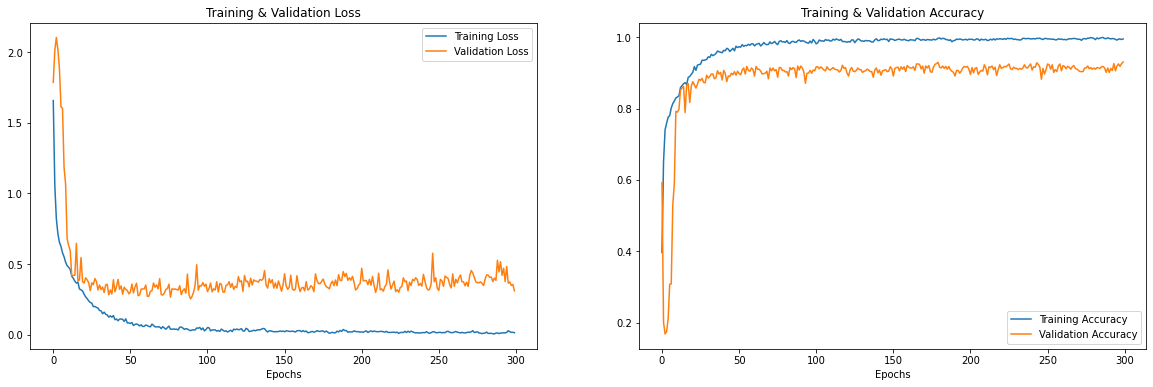

In [ ]:
epochs = [i for i in range(300)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Validation Loss')
ax[0].set_title('Training & Validation Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Validation Accuracy')
ax[1].set_title('Training & Validation Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

12/12 [==============================] - 0s 16ms/step


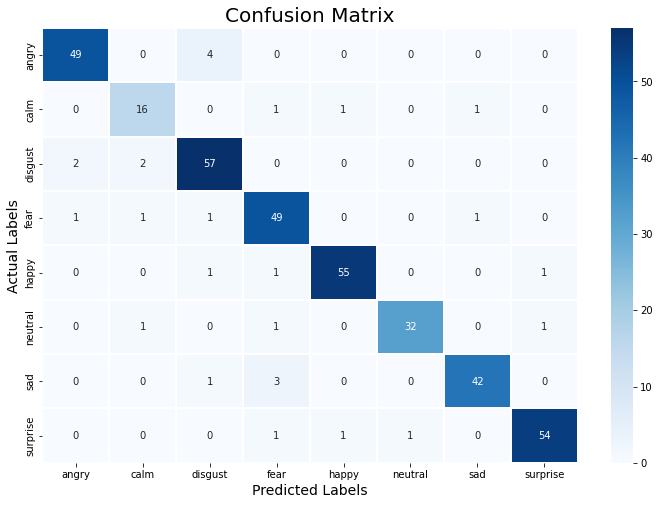

              precision    recall  f1-score   support

       angry       0.94      0.92      0.93        53
        calm       0.80      0.84      0.82        19
     disgust       0.89      0.93      0.91        61
        fear       0.88      0.92      0.90        53
       happy       0.96      0.95      0.96        58
     neutral       0.97      0.91      0.94        35
         sad       0.95      0.91      0.93        46
    surprise       0.96      0.95      0.96        57

    accuracy                           0.93       382
   macro avg       0.92      0.92      0.92       382
weighted avg       0.93      0.93      0.93       382



In [ ]:
# predicting on test data.
pred_test = model.predict(X_test)
#pred_test = pred_test.astype(int).flatten()
y_pred = encoder.inverse_transform(pred_test)

#y_test = y_test.astype(int).flatten()
y_test = encoder.inverse_transform(y_test)
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 8))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()
print(classification_report(y_test, y_pred))